In [ ]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2
df=pd.read_csv("houseDataset2024.csv")

In [ ]:
#3
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22481 entries, 0 to 22480
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             22481 non-null  object 
 1   title           22481 non-null  object 
 2   type            22481 non-null  object 
 3   price           22481 non-null  float64
 4   area            22481 non-null  object 
 5   city            22481 non-null  object 
 6   address         22481 non-null  object 
 7   bedrooms        22481 non-null  object 
 8   baths           22481 non-null  object 
 9   area_sqft       22481 non-null  float64
 10  price_per_sqft  22481 non-null  float64
 11  area_sqm        22481 non-null  float64
 12  price_per_sqm   22481 non-null  float64
 13  Latitude        22481 non-null  float64
 14  Longitude       22481 non-null  float64
 15  date_added      22481 non-null  object 
dtypes: float64(7), object(9)
memory usage: 2.9+ MB


In [ ]:
#4
df=df[df["type"]=="House"]
df.drop(columns=["url","title","area","type","area_sqm","price_per_sqm","date_added","Latitude","Longitude"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22481 entries, 0 to 22480
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           22481 non-null  float64
 1   city            22481 non-null  object 
 2   address         22481 non-null  object 
 3   bedrooms        22481 non-null  object 
 4   baths           22481 non-null  object 
 5   area_sqft       22481 non-null  float64
 6   price_per_sqft  22481 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [ ]:
#5
df.groupby("city")["city"].agg('count')

,city
city,
Islamabad,8499
Karachi,7916
Lahore,6066


In [ ]:
#6
df['bedrooms'] = df['bedrooms'].str.extract('(\d+)').astype(int)
df['baths'] = df['baths'].str.extract('(\d+)').astype(int)

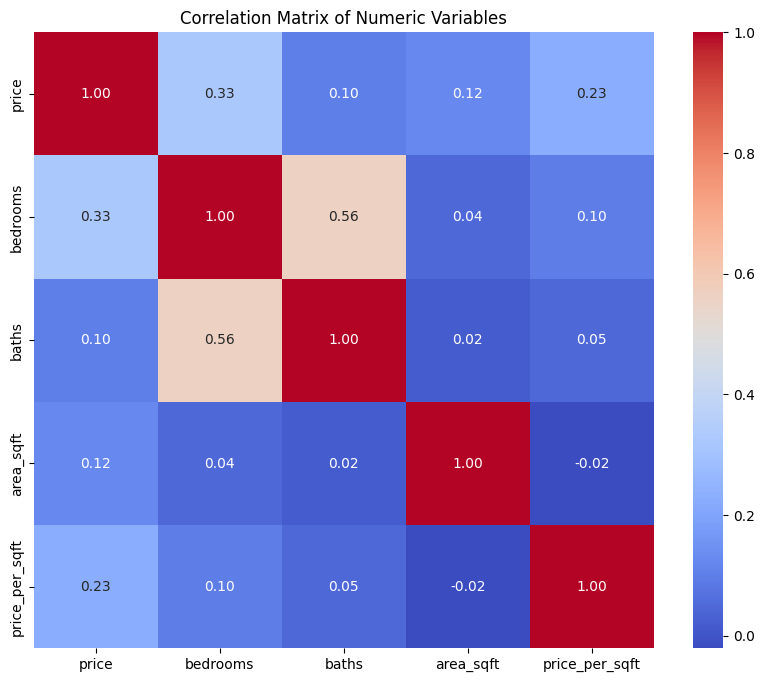

In [ ]:
# Calculate the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [ ]:
df.isnull().sum()

,0
price,0
city,0
address,0
bedrooms,0
baths,0
area_sqft,0
price_per_sqft,0


In [ ]:
#7
df["city"]=pd.factorize(df["city"])[0]

In [ ]:
df.tail()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
22476,94500000.0,2,"DHA Defence, Lahore, Punjab",5,6,5445.0,17355.371901
22477,47500000.0,2,"Askari, Lahore, Punjab",4,5,3267.0,14539.332721
22478,29900000.0,2,"LDA Avenue, Lahore, Punjab",6,6,2722.5,10982.552801
22479,65000000.0,2,"DHA Defence, Lahore, Punjab",6,6,5445.0,11937.557392
22480,36000000.0,2,"State Life Housing Society, Lahore, Punjab",5,6,2722.5,13223.140496


In [ ]:
df["bedrooms"].unique()

array([ 4, 10,  6,  5,  3,  0,  7,  2,  9,  8, 11,  1])

In [ ]:
df[df.bedrooms>=10]

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
1,7.500000e+08,0,"F-7, Islamabad, Islamabad Capital",10,0,20691.00,36247.643903
26,3.000000e+08,0,"F-8, Islamabad, Islamabad Capital",10,0,10890.00,27548.209366
88,1.250000e+09,0,"F-8, Islamabad, Islamabad Capital",10,0,21780.00,57392.102847
135,7.000000e+07,0,"G-8, Islamabad, Islamabad Capital",10,6,4083.75,17141.108050
178,1.180000e+09,0,"F-7, Islamabad, Islamabad Capital",10,0,21780.00,54178.145087
...,...,...,...,...,...,...,...
21730,3.400000e+07,2,"Lahore Medical Housing Society, Lahore, Punjab",10,6,3811.50,8920.372557
21846,1.500000e+08,2,"Shadman, Lahore, Punjab",11,6,11434.50,13118.194936
21979,1.470000e+08,2,"DHA Defence, Lahore, Punjab",10,0,13068.00,11248.852158
22041,3.500000e+08,2,"DHA Defence, Lahore, Punjab",11,0,21780.00,16069.788797


In [ ]:
df["area_sqft"].unique()

array([1.361250e+03, 2.069100e+04, 1.089000e+04, 7.078500e+03,
       5.445000e+03, 1.824075e+03, 1.633500e+03, 8.167500e+03,
       2.178000e+04, 2.450250e+03, 2.178000e+03, 1.905750e+03,
       2.722500e+03, 3.811500e+03, 1.960200e+04, 2.613600e+04,
       1.143450e+04, 9.801000e+03, 8.712000e+03, 6.534000e+03,
       3.865950e+03, 1.089000e+03, 4.356000e+03, 4.083750e+03,
       1.497375e+03, 2.967525e+03, 1.306800e+04, 3.267000e+03,
       5.989500e+03, 1.769625e+03, 1.524600e+03, 2.014650e+04,
       4.846050e+03, 1.388475e+03, 2.668050e+03, 1.742400e+04,
       3.539250e+03, 1.197900e+03, 2.368575e+03, 1.633500e+04,
       8.439750e+02, 2.749725e+03, 2.994750e+03, 5.308875e+03,
       9.256500e+03, 1.034550e+04, 7.623000e+03, 3.375900e+03,
       1.225125e+03, 1.361250e+04, 1.334025e+03, 2.913075e+03,
       2.722500e+04, 4.628250e+03, 9.528750e+02, 1.470150e+03,
       1.579050e+03, 8.167500e+02, 3.021975e+03, 2.858625e+03,
       1.905750e+04, 1.524600e+04, 3.403125e+03, 2.8314

In [ ]:
address_stats=df.groupby("address")["address"].agg('count').sort_values(ascending=False)
len(df.address.unique())
df.shape

(22481, 7)

In [ ]:
len(address_stats[address_stats<=10])

276

In [ ]:
address_less_than_10 = address_stats[address_stats<=10]
address_less_than_10

,address
address,
"Hamza Town, Lahore, Punjab",10
"Nazimabad, Karachi, Sindh",10
"Baldia Town, Karachi, Sindh",10
"Shadab Garden, Lahore, Punjab",10
"Green Avenue, Islamabad, Islamabad Capital",9
...,...
"O-9, Islamabad, Islamabad Capital",1
"OPF Valley, Islamabad, Islamabad Capital",1
"P & D Housing Society, Lahore, Punjab",1


In [ ]:
# handle outliers
df.address=df.address.apply(lambda x: "other" if x in address_less_than_10 else x)
len(df.address.unique())


139

In [ ]:
# df=df.drop(df.index[47950])
# df.tail()
# df.shape

In [ ]:
df1=df[~(df.area_sqft/df.bedrooms<300)]
df1=df1[~df['price_per_sqft'].isin([float('inf'), float('-inf')])]
df1.shape

<ipython-input-19-b517089f8c16>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[~df['price_per_sqft'].isin([float('inf'), float('-inf')])]


(13722, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13722 entries, 0 to 22480
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           13722 non-null  float64
 1   city            13722 non-null  int64  
 2   address         13722 non-null  object 
 3   bedrooms        13722 non-null  int64  
 4   baths           13722 non-null  int64  
 5   area_sqft       13722 non-null  float64
 6   price_per_sqft  13722 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 857.6+ KB


In [ ]:
df1.head()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
0,23500000.0,0,"Bahria Town, Islamabad, Islamabad Capital",4,4,1361.25,17263.544536
1,750000000.0,0,"F-7, Islamabad, Islamabad Capital",10,0,20691.00,36247.643903
2,450000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,10890.00,41322.314050
3,290000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,7078.50,40969.131878
4,225000000.0,0,"F-8, Islamabad, Islamabad Capital",5,5,5445.00,41322.314050


In [ ]:
df.price.describe()

,price
count,2.248100e+04
mean,9.219784e+07
std,1.430166e+08
min,1.400000e+06
25%,2.450000e+07
50%,4.900000e+07
75%,1.025000e+08
max,3.000000e+09


In [ ]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby("address"):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df2=remove_pps_outliers(df1)
df2.shape

(10465, 7)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df2=df2[df2.bedrooms!=0]
df2=df2[df2.baths!=0]
df2.shape

(9457, 7)

In [ ]:
df2.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
df2.shape

(9457, 7)

In [ ]:
dummies=pd.get_dummies(df2.address)
dummies.head()


,"Airport Enclave, Islamabad, Islamabad Capital","Al Rehman Garden, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab","Audit & Accounts Housing Society, Lahore, Punjab","B-17, Islamabad, Islamabad Capital","Bahria Orchard, Lahore, Punjab","Bahria Town, Islamabad, Islamabad Capital","Bahria Town, Lahore, Punjab",...,"Taramrri, Islamabad, Islamabad Capital","Tariq Gardens, Lahore, Punjab","Tarnol, Islamabad, Islamabad Capital","Top City 1, Islamabad, Islamabad Capital","UET Housing Society, Lahore, Punjab","University Town, Islamabad, Islamabad Capital","Valencia Housing Society, Lahore, Punjab","Wapda Town, Lahore, Punjab","Zaraj Housing Scheme, Islamabad, Islamabad Capital",other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9457 entries, 0 to 10464
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           9457 non-null   float64
 1   city            9457 non-null   int64  
 2   address         9457 non-null   object 
 3   bedrooms        9457 non-null   int64  
 4   baths           9457 non-null   int64  
 5   area_sqft       9457 non-null   float64
 6   price_per_sqft  9457 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 591.1+ KB


In [ ]:
df3=pd.concat([df2,dummies],axis='columns')
df3.head()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft,"Airport Enclave, Islamabad, Islamabad Capital","Al Rehman Garden, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab",...,"Taramrri, Islamabad, Islamabad Capital","Tariq Gardens, Lahore, Punjab","Tarnol, Islamabad, Islamabad Capital","Top City 1, Islamabad, Islamabad Capital","UET Housing Society, Lahore, Punjab","University Town, Islamabad, Islamabad Capital","Valencia Housing Society, Lahore, Punjab","Wapda Town, Lahore, Punjab","Zaraj Housing Scheme, Islamabad, Islamabad Capital",other
0,16800000.0,0,"Airport Enclave, Islamabad, Islamabad Capital",4,5,1361.25,12341.597796,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17500000.0,0,"Airport Enclave, Islamabad, Islamabad Capital",4,5,1361.25,12855.831038,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,17000000.0,0,"Airport Enclave, Islamabad, Islamabad Capital",4,5,1361.25,12488.521579,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16500000.0,0,"Airport Enclave, Islamabad, Islamabad Capital",4,5,1361.25,12121.212121,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17500000.0,0,"Airport Enclave, Islamabad, Islamabad Capital",4,5,1361.25,12855.831038,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.drop(columns=['address','price_per_sqft','city'],inplace=True)
df3.head()

,price,bedrooms,baths,area_sqft,"Airport Enclave, Islamabad, Islamabad Capital","Al Rehman Garden, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab","Audit & Accounts Housing Society, Lahore, Punjab",...,"Taramrri, Islamabad, Islamabad Capital","Tariq Gardens, Lahore, Punjab","Tarnol, Islamabad, Islamabad Capital","Top City 1, Islamabad, Islamabad Capital","UET Housing Society, Lahore, Punjab","University Town, Islamabad, Islamabad Capital","Valencia Housing Society, Lahore, Punjab","Wapda Town, Lahore, Punjab","Zaraj Housing Scheme, Islamabad, Islamabad Capital",other
0,16800000.0,4,5,1361.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17500000.0,4,5,1361.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,17000000.0,4,5,1361.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16500000.0,4,5,1361.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17500000.0,4,5,1361.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.to_csv('data1.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
# threshold = df3['price'].quantile(0.90)
# df3 = df3[df3['price'] <= threshold]
# df3.shape

In [ ]:
x=df3.drop('price',axis='columns')
x.head()

,bedrooms,baths,area_sqft,"Airport Enclave, Islamabad, Islamabad Capital","Al Rehman Garden, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab","Audit & Accounts Housing Society, Lahore, Punjab","B-17, Islamabad, Islamabad Capital",...,"Taramrri, Islamabad, Islamabad Capital","Tariq Gardens, Lahore, Punjab","Tarnol, Islamabad, Islamabad Capital","Top City 1, Islamabad, Islamabad Capital","UET Housing Society, Lahore, Punjab","University Town, Islamabad, Islamabad Capital","Valencia Housing Society, Lahore, Punjab","Wapda Town, Lahore, Punjab","Zaraj Housing Scheme, Islamabad, Islamabad Capital",other
0,4,5,1361.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,5,1361.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,5,1361.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,5,1361.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,5,1361.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y=df3.price
y.head()

,price
0,16800000.0
1,17500000.0
2,17000000.0
3,16500000.0
4,17500000.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

-75.55721479505227

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9586438273497798


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Evaluate model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")  # Should be high
print(f"Test R²: {test_r2:.4f}")  # If much lower than Train R², model is overfitting


Train R²: 0.9829
Test R²: 0.9576


In [ ]:
x.columns

Index(['bedrooms', 'baths', 'area_sqft',
       'Airport Enclave, Islamabad, Islamabad Capital',
       'Al Rehman Garden, Lahore, Punjab', 'Allama Iqbal Town, Lahore, Punjab',
       'Architects Engineers Housing Society, Lahore, Punjab',
       'Askari, Lahore, Punjab',
       'Audit & Accounts Housing Society, Lahore, Punjab',
       'B-17, Islamabad, Islamabad Capital',
       ...
       'Taramrri, Islamabad, Islamabad Capital',
       'Tariq Gardens, Lahore, Punjab', 'Tarnol, Islamabad, Islamabad Capital',
       'Top City 1, Islamabad, Islamabad Capital',
       'UET Housing Society, Lahore, Punjab',
       'University Town, Islamabad, Islamabad Capital',
       'Valencia Housing Society, Lahore, Punjab',
       'Wapda Town, Lahore, Punjab',
       'Zaraj Housing Scheme, Islamabad, Islamabad Capital', 'other'],
      dtype='object', length=116)

In [ ]:
def predict_price(location,bedroom,bath,sqft):
  loc_index=np.where(x.columns==location)[0][0]
  X=np.zeros(len(x.columns))
  X[0]=bedroom
  X[1]=bath
  X[2]=sqft
  if loc_index>=0:
    X[loc_index]=1
  return model.predict([X])[0]

In [ ]:
predict_price('Wapda Town, Lahore, Punjab',6,6,2500)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


35261047.61904762

In [ ]:
import pickle
with open("real_estate_model.pickle","wb")as f:
  pickle.dump(model,f)

In [ ]:
from google.colab import files
files.download('real_estate_model.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open ("columns.json","w")as f:
  f.write(json.dumps(columns))